In [2]:
import numpy as np
import math
import scipy.linalg
import matplotlib.pyplot as plt

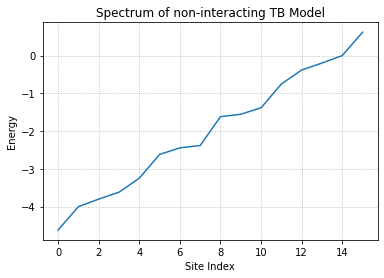

In [7]:
# define matrix lattice
L = 4
lattice = [(i, j) for i in range(1) for j in range(L)]

# define hamiltonian in number basis
site_energy = -1.0
tunelling_energy = -1.0

# insert energies into hamiltonian
hamiltonian_matrix = np.zeros(shape=(2**L, 2**L))
block_size = np.array([math.comb(L, n) for n in range(0, L + 1)])

block_idx_start = np.zeros(L + 1, dtype=int)
block_idx_start[1 : L + 1] = np.cumsum(block_size[0:L])
block_idx_end = np.cumsum(block_size)

for n in range(0, L + 1):
    np.fill_diagonal(
        hamiltonian_matrix[
            block_idx_start[n] : block_idx_end[n] - 1,
            block_idx_start[n] + 1 : block_idx_end[n],
        ],
        tunelling_energy,
    )
    np.fill_diagonal(
        hamiltonian_matrix[
            block_idx_start[n] : block_idx_end[n], block_idx_start[n] : block_idx_end[n]
        ],
        n * site_energy * np.ones(block_size[n]),
    )
    np.fill_diagonal(
        hamiltonian_matrix[
            block_idx_start[n] + 1 : block_idx_end[n],
            block_idx_start[n] : block_idx_end[n] - 1,
        ],
        tunelling_energy,
    )

# diagonalize Hamiltonian
energies, states = scipy.linalg.eigh(hamiltonian_matrix)

plt.title("Spectrum of non-interacting TB Model")
plt.xlabel("Site Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.plot(energies)